In [2]:
import numpy as np
import pandas as pd
import math
import random
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt
f=pd.read_csv("/home/mt/learn/NGSIM数据处理/csv/80/4:00-4:15/80_RL.csv")
f1=f[['Vehicle_ID','Local_X','Local_Y','v_Class','v_Vel','v_Acc','x','x_v','y','y_v','Lane_ID','label']]
f1

,Vehicle_ID,Local_X,Local_Y,v_Class,v_Vel,v_Acc,x,x_v,y,y_v,Lane_ID,label
0,41.0,66.777,567.228,2.0,26.75,1.79,0.007,0.07,2.653,26.53,6.0,1
1,41.0,66.783,569.905,2.0,26.98,2.88,0.006,0.06,2.677,26.77,6.0,1
2,41.0,66.790,572.626,2.0,27.14,1.33,0.007,0.07,2.721,27.21,6.0,1
3,41.0,66.797,575.362,2.0,27.14,-1.32,0.007,0.07,2.736,27.36,6.0,1
4,41.0,66.803,578.079,2.0,27.01,-2.32,0.006,0.06,2.717,27.17,6.0,1
5,41.0,66.809,580.764,2.0,26.83,-1.32,0.006,0.06,2.685,26.85,6.0,1
6,41.0,66.842,583.439,2.0,26.64,-1.59,0.033,0.33,2.675,26.75,6.0,1
7,41.0,66.781,586.103,2.0,26.42,-2.95,-0.061,-0.61,2.664,26.64,6.0,1
8,41.0,66.677,588.725,2.0,26.24,-1.66,-0.104,-1.04,2.622,26.22,6.0,1
9,41.0,66.483,591.322,2.0,26.23,1.46,-0.194,-1.94,2.597,25.97,6.0,1


In [3]:
y_list=np.reshape(f.y.values,[-1,80])
vy_list=np.reshape(f.y_v.values,[-1,80])
v_list=np.reshape(f.v_Vel.values,[-1,80])
x_list=np.reshape(f.x.values,[-1,80])
data_num=int(len(f1)/80)
change_local=x_list[:,40]
vx_list=np.reshape(f.x_v.values,[-1,80])
local_x=np.reshape(f.Local_X.values,[-1,80])
local_y=np.reshape(f.Local_Y.values,[-1,80])
len(local_y)

453

48.168


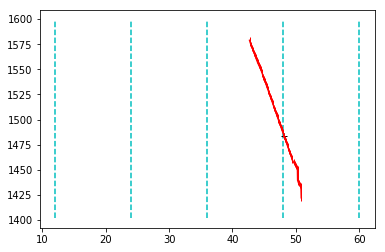

In [4]:
id_num=8
x_truth=local_x[id_num]
y_truth=local_y[id_num]
x_mid=x_truth[39]
print(x_mid)
y_mid=y_truth[39]
plt.plot(x_mid,y_mid,'+',color='black')
# plt.plot(x_val,y_val, label = "val", color='blue', marker='|')
plt.plot(x_truth,y_truth, color='red', marker='|')
plt.vlines([12,24,36,48,60], min(y_truth)-20, max(y_truth)+20, colors = "c", linestyles = "dashed")
plt.show()

In [5]:
erro=0.5
erro1=2
start_mid=[6-erro,18-erro,30-erro,42-erro,54-erro]
end_mid=[6+erro,18+erro,30+erro,42+erro,54+erro]
start_mid1=[6-erro1,18-erro1,30-erro1,42-erro1,54-erro1]
end_mid1=[6+erro1,18+erro1,30+erro1,42+erro1,54+erro1]
start_list=[]
end_list=[]
for i in range(len(x_list)):
    a_list=[]
    for a in range(len(x_list[i])-2):
        if abs(x_list[i][a])>=0.09 and abs(x_list[i][a+1])>=0.09 and abs(x_list[i][a+2])>=0.09:
            a_list.append(a)
    if a_list!=[]:
        start_list.append(a_list[0])
    else:
        start_list.append(0)
start_list

[8,
 0,
 18,
 17,
 14,
 2,
 8,
 17,
 12,
 47,
 23,
 9,
 15,
 23,
 4,
 10,
 8,
 29,
 0,
 30,
 14,
 30,
 4,
 6,
 0,
 19,
 13,
 22,
 0,
 5,
 11,
 0,
 1,
 10,
 0,
 22,
 8,
 10,
 0,
 21,
 9,
 17,
 9,
 28,
 0,
 18,
 22,
 0,
 0,
 4,
 26,
 16,
 0,
 18,
 25,
 14,
 0,
 0,
 0,
 0,
 0,
 27,
 12,
 0,
 23,
 0,
 16,
 7,
 16,
 0,
 18,
 23,
 22,
 11,
 4,
 0,
 0,
 27,
 21,
 0,
 4,
 32,
 2,
 0,
 21,
 0,
 22,
 16,
 21,
 30,
 15,
 17,
 0,
 0,
 0,
 3,
 0,
 26,
 12,
 12,
 18,
 2,
 0,
 0,
 17,
 0,
 0,
 27,
 0,
 8,
 14,
 0,
 16,
 0,
 34,
 6,
 46,
 19,
 7,
 4,
 6,
 29,
 10,
 15,
 0,
 2,
 0,
 26,
 17,
 25,
 19,
 11,
 32,
 0,
 5,
 9,
 4,
 27,
 36,
 5,
 0,
 24,
 27,
 0,
 16,
 2,
 5,
 5,
 0,
 2,
 20,
 2,
 4,
 6,
 0,
 24,
 12,
 1,
 6,
 0,
 9,
 18,
 24,
 0,
 3,
 5,
 3,
 0,
 18,
 19,
 7,
 23,
 1,
 0,
 33,
 0,
 27,
 8,
 24,
 29,
 21,
 0,
 15,
 4,
 27,
 20,
 18,
 20,
 23,
 32,
 0,
 15,
 3,
 0,
 21,
 0,
 29,
 29,
 29,
 0,
 23,
 16,
 0,
 15,
 19,
 26,
 3,
 4,
 4,
 18,
 7,
 2,
 21,
 7,
 25,
 21,
 27,
 11,
 2,
 28,
 0,
 0,


In [6]:
len(end_list)

0

In [7]:
(local_x[:,39]+local_x[:,40])/2

array([60.653 , 23.813 , 35.9065, 23.999 , 47.893 , 35.881 , 24.0565,
       35.8925, 48.102 , 24.1155, 24.079 , 35.7525, 35.795 , 23.8525,
       35.664 , 35.788 , 47.856 , 12.1595, 35.831 , 24.2005, 48.2015,
       35.617 , 48.158 , 36.0525, 74.4635, 60.371 , 47.9235, 35.891 ,
       23.8535, 12.026 , 47.9765, 35.866 , 23.3285, 35.9125, 35.9335,
       23.994 , 23.737 , 23.893 , 35.661 , 24.123 , 48.205 , 35.5175,
       35.6615, 24.104 , 72.4845, 59.985 , 48.105 , 78.718 , 59.5695,
       47.9965, 48.13  , 24.25  , 75.801 , 48.064 , 36.058 , 48.1525,
       35.737 , 74.085 , 48.2685, 35.888 , 24.007 , 23.986 , 35.846 ,
       24.063 , 12.112 , 72.563 , 60.189 , 47.8   , 47.997 , 77.5575,
       60.318 , 48.0065, 48.014 , 47.878 , 35.8865, 48.0725, 48.458 ,
       24.2285, 35.956 , 47.7135, 36.072 , 47.9885, 48.3125, 36.2845,
       11.865 , 75.391 , 60.4515, 48.0015, 23.832 , 24.081 , 35.562 ,
       23.9675, 72.636 , 60.3805, 48.194 , 35.821 , 24.087 , 12.2555,
       24.411 , 60.2

In [8]:
local_x

array([[66.777, 66.783, 66.79 , ..., 48.602, 48.064, 47.594],
       [29.509, 29.31 , 29.186, ..., 18.705, 18.704, 18.703],
       [41.98 , 41.988, 41.994, ..., 29.411, 29.345, 29.279],
       ...,
       [50.409, 50.776, 50.936, ..., 66.594, 66.593, 66.59 ],
       [ 7.774,  7.851,  7.928, ..., 26.245, 26.592, 27.536],
       [55.159, 55.293, 55.429, ..., 52.484, 52.484, 52.484]])

In [9]:
end_list=[]
for i in range(len(local_x)):
    b=[]
    d=[]
    for a in range(len(local_x[0])-2):
        if a>40:
            for c in range(len(start_mid)):
                if local_x[i][a]>=start_mid[c] and local_x[i][a]<=end_mid[c]:
                    d.append(a)
            if abs(x_list[i][a])<=0.1 and abs(x_list[i][a+1])<=0.1 and abs(x_list[i][a+2])<=0.1:
                b.append(a)
  
    if b!=[]:
        point=b[0]
        if 0>=local_x[i][point]<=4 or 8>=local_x[i][point]<=12 or 12>=local_x[i][point]<=16 or 20>=local_x[i][point]<=24 or 24>=local_x[i][point]<=28 or 32>=local_x[i][point]<=36 or 36>=local_x[i][point]<=40 or 44>=local_x[i][point]<=48 or 48>=local_x[i][point]<=52 or 52>=local_x[i][point]<=60:
            if d!=[]:
                end_list.append(d[0])
            else:
                end_list.append(b[0])
        else:
            end_list.append(b[0])   
    else:
        if d!=[]:
            end_list.append(d[0])
        else:
            count=0
            for ii in local_x[i]:
                if ii>=0:
                    count+=1
            end_list.append(count)
end_list

[59,
 61,
 64,
 74,
 53,
 68,
 57,
 76,
 80,
 41,
 62,
 59,
 64,
 62,
 60,
 65,
 61,
 55,
 49,
 52,
 52,
 49,
 57,
 80,
 76,
 75,
 72,
 43,
 60,
 70,
 74,
 55,
 56,
 67,
 55,
 75,
 54,
 73,
 57,
 66,
 44,
 62,
 58,
 53,
 69,
 62,
 47,
 62,
 57,
 63,
 64,
 55,
 72,
 77,
 59,
 75,
 77,
 80,
 61,
 73,
 61,
 76,
 54,
 41,
 54,
 41,
 49,
 65,
 59,
 60,
 58,
 57,
 48,
 68,
 69,
 57,
 41,
 69,
 61,
 52,
 74,
 44,
 63,
 56,
 57,
 42,
 50,
 61,
 42,
 51,
 54,
 80,
 75,
 57,
 75,
 50,
 58,
 50,
 43,
 41,
 72,
 71,
 58,
 41,
 51,
 57,
 44,
 43,
 69,
 64,
 51,
 54,
 74,
 73,
 51,
 63,
 66,
 67,
 54,
 47,
 55,
 80,
 66,
 63,
 71,
 63,
 64,
 69,
 73,
 73,
 68,
 73,
 57,
 70,
 54,
 47,
 64,
 74,
 65,
 67,
 55,
 55,
 71,
 69,
 59,
 56,
 60,
 56,
 62,
 66,
 64,
 53,
 64,
 57,
 80,
 57,
 71,
 62,
 56,
 67,
 54,
 47,
 61,
 72,
 57,
 76,
 64,
 45,
 63,
 80,
 60,
 50,
 48,
 75,
 80,
 53,
 60,
 44,
 54,
 46,
 59,
 80,
 61,
 45,
 77,
 60,
 74,
 59,
 57,
 41,
 62,
 66,
 60,
 50,
 71,
 41,
 48,
 67,
 65,
 53,


In [10]:
end_list=np.reshape(end_list,[-1])
end_list

array([59, 61, 64, 74, 53, 68, 57, 76, 80, 41, 62, 59, 64, 62, 60, 65, 61,
       55, 49, 52, 52, 49, 57, 80, 76, 75, 72, 43, 60, 70, 74, 55, 56, 67,
       55, 75, 54, 73, 57, 66, 44, 62, 58, 53, 69, 62, 47, 62, 57, 63, 64,
       55, 72, 77, 59, 75, 77, 80, 61, 73, 61, 76, 54, 41, 54, 41, 49, 65,
       59, 60, 58, 57, 48, 68, 69, 57, 41, 69, 61, 52, 74, 44, 63, 56, 57,
       42, 50, 61, 42, 51, 54, 80, 75, 57, 75, 50, 58, 50, 43, 41, 72, 71,
       58, 41, 51, 57, 44, 43, 69, 64, 51, 54, 74, 73, 51, 63, 66, 67, 54,
       47, 55, 80, 66, 63, 71, 63, 64, 69, 73, 73, 68, 73, 57, 70, 54, 47,
       64, 74, 65, 67, 55, 55, 71, 69, 59, 56, 60, 56, 62, 66, 64, 53, 64,
       57, 80, 57, 71, 62, 56, 67, 54, 47, 61, 72, 57, 76, 64, 45, 63, 80,
       60, 50, 48, 75, 80, 53, 60, 44, 54, 46, 59, 80, 61, 45, 77, 60, 74,
       59, 57, 41, 62, 66, 60, 50, 71, 41, 48, 67, 65, 53, 59, 77, 73, 63,
       53, 48, 57, 56, 48, 63, 53, 76, 74, 42, 56, 58, 52, 80, 70, 80, 53,
       68, 54, 47, 48, 62

In [11]:
change_lane_x=[]
change_lane_y=[]
for i in range(len(start_list)):
    change_lane_x.append(local_x[i][start_list[i]:end_list[i]])
    change_lane_y.append(local_y[i][start_list[i]:end_list[i]])    
change_lane_y 

[array([588.725, 591.322, 593.951, 596.614, 599.232, 601.762, 604.265,
        606.863, 609.599, 612.47 , 615.405, 618.347, 621.267, 624.17 ,
        627.085, 630.   , 632.862, 635.6  , 638.213, 640.7  , 643.136,
        645.568, 648.017, 650.468, 652.915, 655.362, 657.822, 660.294,
        662.772, 665.263, 667.772, 670.302, 672.842, 675.375, 677.908,
        680.441, 682.974, 685.508, 688.042, 690.575, 693.109, 695.644,
        698.178, 700.706, 703.225, 705.739, 708.258, 710.786, 713.32 ,
        715.855, 718.389]),
 array([386.033, 387.549, 388.987, 390.353, 391.672, 393.032, 394.477,
        395.989, 397.527, 399.042, 400.508, 401.895, 403.171, 404.352,
        405.495, 406.689, 408.007, 409.452, 410.989, 412.586, 414.219,
        415.912, 417.534, 418.99 , 420.384, 421.834, 423.445, 425.153,
        426.876, 428.671, 430.493, 432.404, 434.447, 436.528, 438.556,
        440.449, 442.278, 444.139, 446.004, 447.878, 449.766, 451.663,
        453.564, 455.464, 457.365, 459.263, 461.1

11.802


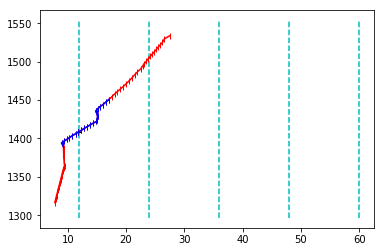

In [12]:
id_num=-2
x_truth=local_x[id_num]
y_truth=local_y[id_num]
x_new=change_lane_x [id_num]
y_new=change_lane_y [id_num]
x_mid=x_truth[39]
print(x_mid)
y_mid=y_truth[39]
plt.plot(x_mid,y_mid,'+',color='black')
# plt.plot(x_val,y_val, label = "val", color='blue', marker='|')
plt.plot(x_truth,y_truth, color='red', marker='|')
plt.plot(x_new,y_new, color='blue', marker='|')
plt.vlines([12,24,36,48,60], min(y_truth)-20, max(y_truth)+20, colors = "c", linestyles = "dashed")
plt.show()

In [13]:
time=(end_list-start_list)/10
time

array([ 5.1,  6.1,  4.6,  5.7,  3.9,  6.6,  4.9,  5.9,  6.8, -0.6,  3.9,
        5. ,  4.9,  3.9,  5.6,  5.5,  5.3,  2.6,  4.9,  2.2,  3.8,  1.9,
        5.3,  7.4,  7.6,  5.6,  5.9,  2.1,  6. ,  6.5,  6.3,  5.5,  5.5,
        5.7,  5.5,  5.3,  4.6,  6.3,  5.7,  4.5,  3.5,  4.5,  4.9,  2.5,
        6.9,  4.4,  2.5,  6.2,  5.7,  5.9,  3.8,  3.9,  7.2,  5.9,  3.4,
        6.1,  7.7,  8. ,  6.1,  7.3,  6.1,  4.9,  4.2,  4.1,  3.1,  4.1,
        3.3,  5.8,  4.3,  6. ,  4. ,  3.4,  2.6,  5.7,  6.5,  5.7,  4.1,
        4.2,  4. ,  5.2,  7. ,  1.2,  6.1,  5.6,  3.6,  4.2,  2.8,  4.5,
        2.1,  2.1,  3.9,  6.3,  7.5,  5.7,  7.5,  4.7,  5.8,  2.4,  3.1,
        2.9,  5.4,  6.9,  5.8,  4.1,  3.4,  5.7,  4.4,  1.6,  6.9,  5.6,
        3.7,  5.4,  5.8,  7.3,  1.7,  5.7,  2. ,  4.8,  4.7,  4.3,  4.9,
        5.1,  5.6,  4.8,  7.1,  6.1,  6.4,  4.3,  5.6,  4.8,  4.9,  6.2,
        2.5,  7. ,  4.9,  3.8,  6. ,  4.7,  2.9,  6.2,  5.5,  3.1,  4.4,
        6.9,  4.3,  5.4,  5.5,  5.1,  6.2,  6.4,  4

In [14]:
x_arr=[]
y_arr=[]
for i in range(len(local_x)):
    if start_list[i]<=2:
        x_arr.extend(local_x[i][a] for a in range(3))
        y_arr.extend(local_y[i][a] for a in range(3))
    else:
        x_arr.extend(local_x[i][start_list[i]+a] for a in range(3))
        y_arr.extend(local_y[i][start_list[i]+a] for a in range(3))
        
x_arr=np.reshape(x_arr,[-1,3])
y_arr=np.reshape(y_arr,[-1,3])

In [15]:
def get_angel(arr1,arr2):
    angel=[]
    for i in range(len(arr1)):
        a=math.atan((arr2[i][2]-arr2[i][0])/(arr1[i][2]-arr1[i][0]+math.exp(-10)))
        if a>=0:
            angel.append(a)
        else:
            angel.append(math.pi+a)
    return angel
angel=get_angel(x_arr,y_arr)

angel=np.array(angel)
angel

array([1.62793929, 1.67969173, 1.68811362, 1.67740329, 1.62518397,
       1.63063285, 1.62343261, 1.67019479, 1.65405028, 0.99263761,
       1.69741796, 1.62158215, 1.62532745, 1.70089085, 1.62216762,
       1.52381146, 1.64743429, 1.61104959, 1.61401693, 1.64181788,
       1.64782676, 1.68334457, 1.49815794, 1.66332275, 1.61946665,
       1.68861783, 1.52184095, 1.61321115, 1.65110896, 1.71330414,
       1.6489636 , 1.63104136, 1.5335187 , 1.66616407, 1.6298292 ,
       1.67128018, 1.62107552, 1.62000906, 1.62471961, 1.75244425,
       1.65452558, 1.63760666, 1.61805056, 1.64882563, 1.73489664,
       1.66678427, 1.64144834, 1.64818371, 1.63117671, 1.63110046,
       1.63663145, 1.60947223, 1.60277702, 1.63201786, 1.67086686,
       1.66088506, 1.61088721, 1.67762505, 1.66707446, 1.67506815,
       1.70254353, 1.65713943, 1.53698243, 1.51893664, 1.65025788,
       1.79678158, 1.62269394, 1.67888861, 1.61802827, 1.59453564,
       1.66827794, 1.80027683, 1.69712624, 1.60723424, 1.54047

In [16]:
vx_list

array([[ 0.07,  0.06,  0.07, ..., -6.26, -5.38, -4.7 ],
       [-1.29, -1.99, -1.24, ...,  0.01, -0.01, -0.01],
       [ 0.06,  0.08,  0.06, ..., -0.65, -0.66, -0.66],
       ...,
       [ 3.46,  3.67,  1.6 , ..., -0.02, -0.01, -0.03],
       [ 0.76,  0.77,  0.77, ...,  3.47,  3.47,  9.44],
       [ 1.35,  1.34,  1.36, ...,  0.  ,  0.  ,  0.  ]])

In [17]:
x_start=[]
x_end=[]
y_start=[]
y_end=[]
vx_start=[]
vy_start=[]
for i in range(len(start_list)):
    x_start.append(local_x[i][start_list[i]])
    x_end.append(local_x[i][end_list[i]-1])
    y_start.append(local_y[i][start_list[i]])
    y_end.append(local_y[i][end_list[i]-1])
    vx_start.append(vx_list[i][start_list[i]])
    vy_start.append(vy_list[i][start_list[i]])
    
x_start=np.array(x_start)
x_end=np.array(x_end)
y_start=np.array(y_start)
y_end=np.array(y_end)
vx_start=np.array(vx_start)
vy_start=np.array(vy_start)
dx=x_end-x_start
dy=y_end-y_start
xyt=np.vstack((dx,dy,time,vx_start,vy_start,angel))
xyt=xyt.transpose()
xyt

array([[-11.907     , 129.664     ,   5.1       ,  -1.04      ,
         26.22      ,   1.62793929],
       [-10.957     , 104.709     ,   6.1       ,  -1.29      ,
         15.71      ,   1.67969173],
       [-11.359     ,  77.197     ,   4.6       ,  -1.09      ,
         16.39      ,   1.68811362],
       ...,
       [ 16.116     , 121.531     ,   6.6       ,   3.46      ,
         16.56      ,   1.39801804],
       [  7.875     ,  59.456     ,   2.4       ,  -1.15      ,
         31.13      ,   1.5317277 ],
       [ -2.598     ,  32.644     ,   7.4       ,   1.35      ,
          0.        ,   0.        ]])

In [18]:
np.shape(xyt)

(453, 6)

In [19]:
arr=[]
for i in range(len(xyt)):
    if xyt[i][0]*xyt[i][1]*xyt[i][1]*xyt[i][3]*xyt[i][4]*xyt[i][5]<=0:
        arr.append(i)
arr

[9,
 15,
 22,
 26,
 32,
 62,
 63,
 74,
 101,
 105,
 119,
 120,
 134,
 146,
 148,
 163,
 164,
 168,
 206,
 212,
 214,
 215,
 216,
 217,
 219,
 222,
 227,
 233,
 235,
 239,
 241,
 245,
 250,
 251,
 252,
 253,
 258,
 261,
 267,
 268,
 270,
 274,
 279,
 287,
 299,
 302,
 303,
 305,
 306,
 307,
 308,
 311,
 312,
 319,
 320,
 328,
 330,
 332,
 333,
 336,
 338,
 341,
 343,
 351,
 352,
 353,
 354,
 357,
 368,
 377,
 380,
 389,
 396,
 398,
 399,
 405,
 406,
 407,
 416,
 417,
 418,
 419,
 420,
 422,
 424,
 429,
 444,
 451,
 452]

In [20]:
xyt_new=np.delete(xyt,arr,0)
xyt_new

array([[-11.907     , 129.664     ,   5.1       ,  -1.04      ,
         26.22      ,   1.62793929],
       [-10.957     , 104.709     ,   6.1       ,  -1.29      ,
         15.71      ,   1.67969173],
       [-11.359     ,  77.197     ,   4.6       ,  -1.09      ,
         16.39      ,   1.68811362],
       ...,
       [  6.058     , 111.358     ,   4.9       ,   1.27      ,
         22.75      ,   1.5152878 ],
       [ 11.435     ,  80.92      ,   5.2       ,   1.73      ,
          7.51      ,   1.79163376],
       [ 16.116     , 121.531     ,   6.6       ,   3.46      ,
         16.56      ,   1.39801804]])

In [21]:
np.shape(xyt_new)

(364, 6)

In [22]:
avx=xyt_new[:,[5,3,0,2]]
avx   #angle,vx,x,time

array([[  1.62793929,  -1.04      , -11.907     ,   5.1       ],
       [  1.67969173,  -1.29      , -10.957     ,   6.1       ],
       [  1.68811362,  -1.09      , -11.359     ,   4.6       ],
       ...,
       [  1.5152878 ,   1.27      ,   6.058     ,   4.9       ],
       [  1.79163376,   1.73      ,  11.435     ,   5.2       ],
       [  1.39801804,   3.46      ,  16.116     ,   6.6       ]])

In [23]:
a1=(avx[:,0]-1.54)*20
avx[:,0]=a1
for i in range(len(a1)):
    if abs(a1[i])-abs(a1[i])!=0:
        print(i)


353


In [24]:
avx=np.delete(avx,353,0)
avx

array([[  1.75878584,  -1.04      , -11.907     ,   5.1       ],
       [  2.7938347 ,  -1.29      , -10.957     ,   6.1       ],
       [  2.96227232,  -1.09      , -11.359     ,   4.6       ],
       ...,
       [ -0.49424392,   1.27      ,   6.058     ,   4.9       ],
       [  5.03267518,   1.73      ,  11.435     ,   5.2       ],
       [ -2.83963916,   3.46      ,  16.116     ,   6.6       ]])

In [25]:
# X=avx[:,:3]
# pdx=pd.DataFrame(data=X)
# pdy=pd.DataFrame(data=avx)
# Y=avx[:,3]
# X=X.astype(np.float32)
# Y=Y.astype(np.float32)

# print(pdx.describe())#数据描述，会显示最值，平均数等信息，可以简单判断数据中是否有异常值
# print(pdx[pdx.isnull()==True].count())#检验缺失值，若输出为0，说明该列没有缺失值
 
# #输出相关系数，判断是否值得做线性回归模型
# print(pdy.corr())#0-0.3弱相关；0.3-0.6中相关；0.6-1强相关；
# print(X.tolist())

In [26]:
avg_v=np.mean(abs(avx[:,2])/avx[:,3])
avg_v

2.061756128343493

In [27]:
local_x

array([[66.777, 66.783, 66.79 , ..., 48.602, 48.064, 47.594],
       [29.509, 29.31 , 29.186, ..., 18.705, 18.704, 18.703],
       [41.98 , 41.988, 41.994, ..., 29.411, 29.345, 29.279],
       ...,
       [50.409, 50.776, 50.936, ..., 66.594, 66.593, 66.59 ],
       [ 7.774,  7.851,  7.928, ..., 26.245, 26.592, 27.536],
       [55.159, 55.293, 55.429, ..., 52.484, 52.484, 52.484]])

In [28]:
start_list

[8,
 0,
 18,
 17,
 14,
 2,
 8,
 17,
 12,
 47,
 23,
 9,
 15,
 23,
 4,
 10,
 8,
 29,
 0,
 30,
 14,
 30,
 4,
 6,
 0,
 19,
 13,
 22,
 0,
 5,
 11,
 0,
 1,
 10,
 0,
 22,
 8,
 10,
 0,
 21,
 9,
 17,
 9,
 28,
 0,
 18,
 22,
 0,
 0,
 4,
 26,
 16,
 0,
 18,
 25,
 14,
 0,
 0,
 0,
 0,
 0,
 27,
 12,
 0,
 23,
 0,
 16,
 7,
 16,
 0,
 18,
 23,
 22,
 11,
 4,
 0,
 0,
 27,
 21,
 0,
 4,
 32,
 2,
 0,
 21,
 0,
 22,
 16,
 21,
 30,
 15,
 17,
 0,
 0,
 0,
 3,
 0,
 26,
 12,
 12,
 18,
 2,
 0,
 0,
 17,
 0,
 0,
 27,
 0,
 8,
 14,
 0,
 16,
 0,
 34,
 6,
 46,
 19,
 7,
 4,
 6,
 29,
 10,
 15,
 0,
 2,
 0,
 26,
 17,
 25,
 19,
 11,
 32,
 0,
 5,
 9,
 4,
 27,
 36,
 5,
 0,
 24,
 27,
 0,
 16,
 2,
 5,
 5,
 0,
 2,
 20,
 2,
 4,
 6,
 0,
 24,
 12,
 1,
 6,
 0,
 9,
 18,
 24,
 0,
 3,
 5,
 3,
 0,
 18,
 19,
 7,
 23,
 1,
 0,
 33,
 0,
 27,
 8,
 24,
 29,
 21,
 0,
 15,
 4,
 27,
 20,
 18,
 20,
 23,
 32,
 0,
 15,
 3,
 0,
 21,
 0,
 29,
 29,
 29,
 0,
 23,
 16,
 0,
 15,
 19,
 26,
 3,
 4,
 4,
 18,
 7,
 2,
 21,
 7,
 25,
 21,
 27,
 11,
 2,
 28,
 0,
 0,


In [29]:
x_start

array([66.677, 29.509, 41.93 , 28.317, 54.423, 42.487, 29.334, 41.316,
       50.629, 24.252, 29.712, 40.752, 40.575, 28.113, 42.365, 41.706,
       52.709, 14.274, 42.522, 27.038, 53.034, 40.353, 51.932, 40.86 ,
       81.926, 64.185, 52.358, 37.033, 29.728, 17.271, 51.482, 43.967,
       29.132, 41.566, 39.776, 28.549, 28.526, 30.098, 40.21 , 29.957,
       53.767, 39.694, 39.994, 29.296, 77.992, 63.484, 51.643, 81.197,
       65.526, 53.335, 52.019, 27.764, 89.886, 51.385, 41.55 , 51.788,
       40.374, 85.426, 58.778, 45.567, 28.646, 28.728, 41.705, 31.231,
       17.29 , 76.727, 65.04 , 57.381, 53.207, 82.939, 66.129, 53.287,
       52.992, 51.203, 39.729, 52.089, 51.256, 27.317, 40.115, 56.71 ,
       40.942, 51.109, 52.036, 43.2  , 16.84 , 78.799, 66.633, 53.425,
       27.714, 28.359, 40.677, 29.672, 78.05 , 67.007, 56.103, 43.077,
       35.595, 18.184, 27.714, 66.9  , 52.703, 55.687, 67.295, 51.001,
       17.098, 55.422, 73.781, 65.746, 54.814, 29.609, 65.975, 53.789,
      

In [30]:
x_end

array([54.77 , 18.552, 30.571, 18.59 , 43.581, 30.998, 18.535, 30.518,
       42.696, 24.082, 18.654, 30.72 , 30.515, 18.576, 30.585, 30.637,
       44.992,  6.675, 30.582, 18.761, 42.993, 30.602, 42.721, 30.907,
       64.263, 54.82 , 42.604, 35.544, 18.739,  7.345, 43.729, 31.58 ,
       19.638, 30.574, 33.409, 18.614, 20.458, 18.551, 30.754, 18.555,
       47.503, 32.391, 30.662, 18.805, 66.744, 58.233, 47.051, 77.643,
       57.919, 43.695, 42.624, 20.319, 54.522, 42.845, 30.591, 42.525,
       30.508, 58.778, 42.713, 30.501, 18.613, 18.534, 30.574, 23.977,
        7.982, 72.515, 57.214, 42.503, 42.586, 73.259, 55.938, 42.651,
       45.879, 42.714, 30.604, 42.656, 48.458, 18.65 , 30.579, 44.505,
       30.584, 46.829, 42.591, 32.171,  6.608, 75.169, 57.495, 43.317,
       23.581, 18.748, 30.899, 18.62 , 64.649, 56.287, 43.485, 30.796,
       18.654,  8.768, 24.277, 60.17 , 42.599, 42.565, 56.761, 48.065,
        6.717, 42.827, 71.984, 59.51 , 43.561, 18.582, 56.101, 44.812,
      

In [31]:
x_pre=[]
for i in range(len(local_x)):
    if local_x[i][-1]-local_x[i][0]<=0:
        x_pre.append(-(x_start[i]%12+6))
    else:
        x_pre.append(12-x_start[i]%12+6)
x_pre        

[-12.676999999999992,
 -11.509,
 -11.93,
 -10.316999999999997,
 -12.423000000000002,
 -12.486999999999995,
 -11.334,
 -11.316000000000003,
 -8.628999999999998,
 17.748,
 -11.712,
 -10.751999999999995,
 -10.575000000000003,
 -10.113000000000003,
 -12.365000000000002,
 -11.706000000000003,
 -10.708999999999996,
 -8.274000000000001,
 -12.521999999999998,
 -9.038,
 -11.033999999999999,
 -10.353000000000002,
 -9.931999999999995,
 -10.86,
 -15.926000000000002,
 -10.185000000000002,
 -10.358000000000004,
 -7.033000000000001,
 -11.728000000000002,
 -11.271,
 -9.482,
 -13.966999999999999,
 -11.131999999999998,
 -11.566000000000003,
 -9.775999999999996,
 -10.549,
 -10.526,
 -12.09800000000001,
 -10.21,
 -11.956999999999997,
 -11.766999999999996,
 -9.694000000000003,
 -9.994,
 -11.296,
 -11.992000000000004,
 -9.483999999999995,
 14.357,
 -15.197000000000003,
 -11.52600000000001,
 12.665,
 -10.018999999999998,
 14.236,
 -11.886000000000024,
 -9.384999999999998,
 -11.549999999999997,
 -9.7880000000

In [32]:
time_pre=abs(x_pre/avg_v)
time_pre

array([6.14864184, 5.58213449, 5.78632935, 5.00398658, 6.02544589,
       6.05648739, 5.4972554 , 5.48852497, 4.18526706, 8.60819558,
       5.68059425, 5.21497177, 5.12912262, 4.9050418 , 5.99731454,
       5.67768411, 5.19411576, 4.01308374, 6.07346321, 4.38364163,
       5.35174837, 5.02144742, 4.81725257, 5.2673543 , 7.72448292,
       4.93996349, 5.02387254, 3.41116968, 5.68835462, 5.46669892,
       4.59899203, 6.77432205, 5.39928067, 5.60978083, 4.74158891,
       5.11651201, 5.10535648, 5.86781328, 4.95208908, 5.79942498,
       5.70727053, 4.70181699, 4.84732402, 5.47882451, 5.8164008 ,
       4.59996208, 6.96348118, 7.37090085, 5.59037989, 6.14282156,
       4.8594496 , 6.90479335, 5.76498832, 4.55194476, 5.60202045,
       4.74740919, 5.03163292, 3.60178389, 8.13772287, 7.55035951,
       5.16355929, 5.20333121, 5.67719908, 6.41734481, 6.16464762,
       5.20284618, 5.35465851, 7.46014516, 5.43565742, 8.21581164,
       5.88284901, 6.16610269, 5.33137739, 4.4636705 , 4.71879

In [33]:
time

array([ 5.1,  6.1,  4.6,  5.7,  3.9,  6.6,  4.9,  5.9,  6.8, -0.6,  3.9,
        5. ,  4.9,  3.9,  5.6,  5.5,  5.3,  2.6,  4.9,  2.2,  3.8,  1.9,
        5.3,  7.4,  7.6,  5.6,  5.9,  2.1,  6. ,  6.5,  6.3,  5.5,  5.5,
        5.7,  5.5,  5.3,  4.6,  6.3,  5.7,  4.5,  3.5,  4.5,  4.9,  2.5,
        6.9,  4.4,  2.5,  6.2,  5.7,  5.9,  3.8,  3.9,  7.2,  5.9,  3.4,
        6.1,  7.7,  8. ,  6.1,  7.3,  6.1,  4.9,  4.2,  4.1,  3.1,  4.1,
        3.3,  5.8,  4.3,  6. ,  4. ,  3.4,  2.6,  5.7,  6.5,  5.7,  4.1,
        4.2,  4. ,  5.2,  7. ,  1.2,  6.1,  5.6,  3.6,  4.2,  2.8,  4.5,
        2.1,  2.1,  3.9,  6.3,  7.5,  5.7,  7.5,  4.7,  5.8,  2.4,  3.1,
        2.9,  5.4,  6.9,  5.8,  4.1,  3.4,  5.7,  4.4,  1.6,  6.9,  5.6,
        3.7,  5.4,  5.8,  7.3,  1.7,  5.7,  2. ,  4.8,  4.7,  4.3,  4.9,
        5.1,  5.6,  4.8,  7.1,  6.1,  6.4,  4.3,  5.6,  4.8,  4.9,  6.2,
        2.5,  7. ,  4.9,  3.8,  6. ,  4.7,  2.9,  6.2,  5.5,  3.1,  4.4,
        6.9,  4.3,  5.4,  5.5,  5.1,  6.2,  6.4,  4

In [34]:
x_train=avx[:,:3]
y_train=np.reshape(avx[:,3],[-1,1])
import numpy as np
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
#MinMaxScaler(copy=True, feature_range=(0, 1))
x_train = min_max_scaler.fit_transform(x_train)
x_train

array([[0.33675382, 0.73983364, 0.43811285],
       [0.39668439, 0.72828096, 0.45585626],
       [0.40643714, 0.73752311, 0.44834799],
       ...,
       [0.20630068, 0.84658041, 0.7736501 ],
       [0.52631595, 0.86783734, 0.87407781],
       [0.07049947, 0.94778189, 0.96150614]])

In [35]:
x_train=avx[:,:3]
y_train=np.reshape(avx[:,3],[-1,1])
from keras.optimizers import SGD,adam
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential()  #层次模型
model.add(Dense(32,input_dim=3,activation='tanh')) #输入层，Dense表示BP层
# model.add(dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))  #输出层
model.compile(loss='mean_squared_error', optimizer='adam') #编译模型
model.fit(x_train, y_train, nb_epoch = 1000, batch_size = 32) #训练模型1000次
# model.save_weights(modelfile) #保存模型权重
time_predict=model.predict(x_train)
time_predict

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/1000
363/363 [==============================] - 7s 19ms/step - loss: 10.1816
Epoch 2/1000
363/363 [==============================] - 0s 73us/step - loss: 2.1518
Epoch 3/1000
363/363 [==============================] - 0s 90us/step - loss: 1.8101
Epoch 4/1000
363/363 [==============================] - 0s 90us/step - loss: 1.6380
Epoch 5/1000
363/363 [==============================] - 0s 92us/step - loss: 1.6071
Epoch 6/1000
363/363 [==============================] - 0s 86us/step - loss: 1.5429
Epoch 7/1000
363/363 [==============================] - 0s 81us/step - loss: 1.5047
Epoch 8/1000
363/363 [==============================] - 0s 80us/step - loss: 1.4757
Epoch 9/1000
363/363 [==============================] - 0s 71us/step - loss: 1.4492
Epoch 10/1000
363/363 [==============================] - 0s 83us/step - loss: 1.4333
Epoch 11/1000
363/363 [==============================] - 0s 94us/step - loss: 1.6109
Epoch 12/1000
363/363 [==============================] - 0s 82us/step - l

363/363 [==============================] - 0s 70us/step - loss: 1.3240
Epoch 98/1000
363/363 [==============================] - 0s 88us/step - loss: 1.3099
Epoch 99/1000
363/363 [==============================] - 0s 73us/step - loss: 1.2839
Epoch 100/1000
363/363 [==============================] - 0s 75us/step - loss: 1.4359
Epoch 101/1000
363/363 [==============================] - 0s 81us/step - loss: 1.3647
Epoch 102/1000
363/363 [==============================] - 0s 84us/step - loss: 1.2849
Epoch 103/1000
363/363 [==============================] - 0s 68us/step - loss: 1.2592
Epoch 104/1000
363/363 [==============================] - 0s 74us/step - loss: 1.3042
Epoch 105/1000
363/363 [==============================] - 0s 80us/step - loss: 1.2355
Epoch 106/1000
363/363 [==============================] - 0s 70us/step - loss: 1.2577
Epoch 107/1000
363/363 [==============================] - 0s 74us/step - loss: 1.2297
Epoch 108/1000
363/363 [==============================] - 0s 73us/step 

363/363 [==============================] - 0s 87us/step - loss: 1.2138
Epoch 193/1000
363/363 [==============================] - 0s 82us/step - loss: 1.1723
Epoch 194/1000
363/363 [==============================] - 0s 78us/step - loss: 1.2564
Epoch 195/1000
363/363 [==============================] - 0s 78us/step - loss: 1.2286
Epoch 196/1000
363/363 [==============================] - 0s 71us/step - loss: 1.2524
Epoch 197/1000
363/363 [==============================] - 0s 77us/step - loss: 1.1654
Epoch 198/1000
363/363 [==============================] - 0s 82us/step - loss: 1.1671
Epoch 199/1000
363/363 [==============================] - 0s 68us/step - loss: 1.1523
Epoch 200/1000
363/363 [==============================] - 0s 82us/step - loss: 1.1357
Epoch 201/1000
363/363 [==============================] - 0s 73us/step - loss: 1.1323
Epoch 202/1000
363/363 [==============================] - 0s 73us/step - loss: 1.1333
Epoch 203/1000
363/363 [==============================] - 0s 76us/ste

363/363 [==============================] - 0s 79us/step - loss: 1.1163
Epoch 288/1000
363/363 [==============================] - 0s 72us/step - loss: 1.0869
Epoch 289/1000
363/363 [==============================] - 0s 74us/step - loss: 1.1102
Epoch 290/1000
363/363 [==============================] - 0s 73us/step - loss: 1.1204
Epoch 291/1000
363/363 [==============================] - 0s 69us/step - loss: 1.0818
Epoch 292/1000
363/363 [==============================] - 0s 81us/step - loss: 1.1463
Epoch 293/1000
363/363 [==============================] - 0s 74us/step - loss: 1.2371
Epoch 294/1000
363/363 [==============================] - 0s 82us/step - loss: 1.2768
Epoch 295/1000
363/363 [==============================] - 0s 82us/step - loss: 1.1755
Epoch 296/1000
363/363 [==============================] - 0s 88us/step - loss: 1.0966
Epoch 297/1000
363/363 [==============================] - 0s 76us/step - loss: 1.1140
Epoch 298/1000
363/363 [==============================] - 0s 72us/ste

363/363 [==============================] - 0s 70us/step - loss: 1.0170
Epoch 383/1000
363/363 [==============================] - 0s 69us/step - loss: 0.9540
Epoch 384/1000
363/363 [==============================] - 0s 67us/step - loss: 0.9688
Epoch 385/1000
363/363 [==============================] - 0s 69us/step - loss: 0.9729
Epoch 386/1000
363/363 [==============================] - 0s 80us/step - loss: 0.9911
Epoch 387/1000
363/363 [==============================] - 0s 71us/step - loss: 0.9911
Epoch 388/1000
363/363 [==============================] - 0s 71us/step - loss: 1.0859
Epoch 389/1000
363/363 [==============================] - 0s 69us/step - loss: 1.0384
Epoch 390/1000
363/363 [==============================] - 0s 72us/step - loss: 1.0213
Epoch 391/1000
363/363 [==============================] - 0s 75us/step - loss: 0.9427
Epoch 392/1000
363/363 [==============================] - 0s 76us/step - loss: 0.9544
Epoch 393/1000
363/363 [==============================] - 0s 74us/ste

363/363 [==============================] - 0s 69us/step - loss: 0.9792
Epoch 478/1000
363/363 [==============================] - 0s 67us/step - loss: 0.9270
Epoch 479/1000
363/363 [==============================] - 0s 74us/step - loss: 0.9089
Epoch 480/1000
363/363 [==============================] - 0s 70us/step - loss: 0.9281
Epoch 481/1000
363/363 [==============================] - 0s 82us/step - loss: 0.8911
Epoch 482/1000
363/363 [==============================] - 0s 86us/step - loss: 0.9086
Epoch 483/1000
363/363 [==============================] - 0s 69us/step - loss: 0.8943
Epoch 484/1000
363/363 [==============================] - 0s 84us/step - loss: 0.9281
Epoch 485/1000
363/363 [==============================] - 0s 92us/step - loss: 0.9000
Epoch 486/1000
363/363 [==============================] - 0s 77us/step - loss: 0.8512
Epoch 487/1000
363/363 [==============================] - 0s 74us/step - loss: 0.9000
Epoch 488/1000
363/363 [==============================] - 0s 77us/ste

363/363 [==============================] - 0s 70us/step - loss: 0.9002
Epoch 573/1000
363/363 [==============================] - 0s 67us/step - loss: 0.8800
Epoch 574/1000
363/363 [==============================] - 0s 69us/step - loss: 0.8670
Epoch 575/1000
363/363 [==============================] - 0s 75us/step - loss: 0.8658
Epoch 576/1000
363/363 [==============================] - 0s 83us/step - loss: 0.8652
Epoch 577/1000
363/363 [==============================] - 0s 69us/step - loss: 0.8557
Epoch 578/1000
363/363 [==============================] - 0s 81us/step - loss: 0.8363
Epoch 579/1000
363/363 [==============================] - 0s 70us/step - loss: 0.8979
Epoch 580/1000
363/363 [==============================] - 0s 74us/step - loss: 0.9801
Epoch 581/1000
363/363 [==============================] - 0s 80us/step - loss: 0.9372
Epoch 582/1000
363/363 [==============================] - 0s 82us/step - loss: 0.9099
Epoch 583/1000
363/363 [==============================] - 0s 80us/ste

363/363 [==============================] - 0s 78us/step - loss: 0.8019
Epoch 668/1000
363/363 [==============================] - 0s 70us/step - loss: 0.8250
Epoch 669/1000
363/363 [==============================] - 0s 81us/step - loss: 0.8044
Epoch 670/1000
363/363 [==============================] - 0s 69us/step - loss: 0.8326
Epoch 671/1000
363/363 [==============================] - 0s 77us/step - loss: 0.8197
Epoch 672/1000
363/363 [==============================] - 0s 72us/step - loss: 0.7890
Epoch 673/1000
363/363 [==============================] - 0s 70us/step - loss: 0.7763
Epoch 674/1000
363/363 [==============================] - 0s 76us/step - loss: 0.7874
Epoch 675/1000
363/363 [==============================] - 0s 77us/step - loss: 0.7698
Epoch 676/1000
363/363 [==============================] - 0s 64us/step - loss: 0.7919
Epoch 677/1000
363/363 [==============================] - 0s 84us/step - loss: 0.7938
Epoch 678/1000
363/363 [==============================] - 0s 76us/ste

363/363 [==============================] - 0s 74us/step - loss: 0.7068
Epoch 763/1000
363/363 [==============================] - 0s 65us/step - loss: 0.7130
Epoch 764/1000
363/363 [==============================] - 0s 76us/step - loss: 0.7451
Epoch 765/1000
363/363 [==============================] - 0s 66us/step - loss: 0.7409
Epoch 766/1000
363/363 [==============================] - 0s 69us/step - loss: 0.7281
Epoch 767/1000
363/363 [==============================] - 0s 66us/step - loss: 0.7076
Epoch 768/1000
363/363 [==============================] - 0s 85us/step - loss: 0.7346
Epoch 769/1000
363/363 [==============================] - 0s 81us/step - loss: 0.7030
Epoch 770/1000
363/363 [==============================] - 0s 65us/step - loss: 0.6843
Epoch 771/1000
363/363 [==============================] - 0s 84us/step - loss: 0.7126
Epoch 772/1000
363/363 [==============================] - 0s 77us/step - loss: 0.6933
Epoch 773/1000
363/363 [==============================] - 0s 76us/ste

363/363 [==============================] - 0s 73us/step - loss: 0.6707
Epoch 858/1000
363/363 [==============================] - 0s 69us/step - loss: 0.6502
Epoch 859/1000
363/363 [==============================] - 0s 67us/step - loss: 0.6974
Epoch 860/1000
363/363 [==============================] - 0s 78us/step - loss: 0.6455
Epoch 861/1000
363/363 [==============================] - 0s 72us/step - loss: 0.6235
Epoch 862/1000
363/363 [==============================] - 0s 73us/step - loss: 0.6355
Epoch 863/1000
363/363 [==============================] - 0s 74us/step - loss: 0.7233
Epoch 864/1000
363/363 [==============================] - 0s 65us/step - loss: 0.6578
Epoch 865/1000
363/363 [==============================] - 0s 80us/step - loss: 0.6893
Epoch 866/1000
363/363 [==============================] - 0s 70us/step - loss: 0.6469
Epoch 867/1000
363/363 [==============================] - 0s 76us/step - loss: 0.6915
Epoch 868/1000
363/363 [==============================] - 0s 83us/ste

363/363 [==============================] - 0s 73us/step - loss: 0.6652
Epoch 953/1000
363/363 [==============================] - 0s 70us/step - loss: 0.6241
Epoch 954/1000
363/363 [==============================] - 0s 76us/step - loss: 0.5998
Epoch 955/1000
363/363 [==============================] - 0s 75us/step - loss: 0.5786
Epoch 956/1000
363/363 [==============================] - 0s 81us/step - loss: 0.6288
Epoch 957/1000
363/363 [==============================] - 0s 81us/step - loss: 0.5947
Epoch 958/1000
363/363 [==============================] - 0s 69us/step - loss: 0.6096
Epoch 959/1000
363/363 [==============================] - 0s 73us/step - loss: 0.6615
Epoch 960/1000
363/363 [==============================] - 0s 80us/step - loss: 0.6122
Epoch 961/1000
363/363 [==============================] - 0s 67us/step - loss: 0.5842
Epoch 962/1000
363/363 [==============================] - 0s 74us/step - loss: 0.5917
Epoch 963/1000
363/363 [==============================] - 0s 89us/ste

array([[6.338499 ],
       [4.9742823],
       [4.166713 ],
       [5.514742 ],
       [5.3650804],
       [6.399146 ],
       [5.327929 ],
       [5.494444 ],
       [6.1537466],
       [4.05883  ],
       [5.2933564],
       [5.161932 ],
       [5.146947 ],
       [6.194639 ],
       [5.193669 ],
       [3.3015401],
       [5.5384007],
       [2.1831431],
       [4.34032  ],
       [3.3827014],
       [5.2899356],
       [7.7247953],
       [5.21345  ],
       [2.2121005],
       [5.527086 ],
       [5.5736265],
       [5.643515 ],
       [6.583932 ],
       [4.66738  ],
       [5.8580894],
       [5.6715374],
       [4.879828 ],
       [5.8009486],
       [5.7212744],
       [4.5258875],
       [3.5854   ],
       [4.8179173],
       [5.0719037],
       [4.808074 ],
       [7.0843945],
       [4.3641195],
       [2.4527802],
       [5.376269 ],
       [5.1422305],
       [5.099412 ],
       [5.065163 ],
       [3.7137928],
       [7.3399587],
       [5.7852674],
       [4.8452554],


In [36]:
vy_start

array([26.22, 15.71, 16.39, 19.7 , 30.15, 17.77, 18.95, 15.17, 14.08,
       14.02, 19.47, 24.95, 27.2 , 18.05, 29.23, 28.93, 18.73, 34.5 ,
       22.83, 29.59, 22.64, 28.04, 20.82, 22.95, 30.67, 15.66, 25.76,
       35.34, 13.03, 17.57, 20.84, 19.  , 25.98, 21.8 , 21.52, 26.47,
       20.93, 21.96, 33.89, 24.45, 25.96, 34.37, 31.46, 34.95, 17.51,
       21.34, 31.02, 19.16, 24.01, 26.06, 32.64, 39.5 , 38.49, 22.48,
       24.19, 25.6 , 24.47, 23.62, 21.93, 26.05, 22.55, 29.33, 31.06,
       41.42, 32.71, 10.37, 25.8 , 20.15, 21.16, 42.07, 28.71,  8.59,
       23.92, 28.24, 33.68, 29.5 , 25.96, 24.7 , 32.5 , 36.03, 28.37,
       32.66, 26.08, 25.39, 38.14, 22.48, 32.29, 16.79, 27.06, 30.44,
       21.63, 26.73, 28.54, 20.25, 17.35,  7.51, 14.84, 31.95, 34.09,
       13.6 , 14.85, 34.62, 24.95, 22.89, 33.84, 33.13, 11.23, 21.52,
       22.22, 26.48, 42.89, 35.66, 37.83, 32.68, 25.05, 18.66, 37.23,
       37.16, 49.38, 41.64, 31.37, 27.64, 26.58, 21.99, 63.28, 41.24,
       29.23, 26.61,

In [37]:
dy

array([129.664, 104.709,  77.197, 156.551, 128.765, 170.738, 110.736,
       119.502, 143.961, -11.859,  78.613, 141.221, 114.819,  89.215,
       183.793, 142.381, 109.238, 102.018, 102.536,  68.416, 106.73 ,
        44.744, 142.111, 191.771, 160.306, 101.075, 120.744,  69.881,
        89.828, 166.196, 125.25 , 120.001, 137.659, 137.548, 145.861,
       143.641,  97.935, 142.838, 187.496, 109.98 ,  86.699, 130.946,
       160.738,  86.297, 157.87 ,  99.189,  82.761, 125.558, 153.78 ,
       170.917, 113.279, 158.916, 213.019, 147.265, 114.79 , 175.095,
       198.807, 153.937, 160.251, 175.017, 169.006, 120.625, 160.258,
       145.919, 116.103,  60.198,  81.04 , 137.611, 133.311, 188.806,
       102.532,  50.679,  55.202, 161.326, 214.548, 166.846, 107.335,
       104.441, 123.268, 152.625, 159.684,  34.318, 130.5  , 147.679,
       149.337,  78.747,  84.459,  99.935,  53.895,  69.484,  84.06 ,
       187.111, 165.293, 107.747,  89.891,  48.304,  92.527,  96.887,
        90.742,  46.

In [38]:
time

array([ 5.1,  6.1,  4.6,  5.7,  3.9,  6.6,  4.9,  5.9,  6.8, -0.6,  3.9,
        5. ,  4.9,  3.9,  5.6,  5.5,  5.3,  2.6,  4.9,  2.2,  3.8,  1.9,
        5.3,  7.4,  7.6,  5.6,  5.9,  2.1,  6. ,  6.5,  6.3,  5.5,  5.5,
        5.7,  5.5,  5.3,  4.6,  6.3,  5.7,  4.5,  3.5,  4.5,  4.9,  2.5,
        6.9,  4.4,  2.5,  6.2,  5.7,  5.9,  3.8,  3.9,  7.2,  5.9,  3.4,
        6.1,  7.7,  8. ,  6.1,  7.3,  6.1,  4.9,  4.2,  4.1,  3.1,  4.1,
        3.3,  5.8,  4.3,  6. ,  4. ,  3.4,  2.6,  5.7,  6.5,  5.7,  4.1,
        4.2,  4. ,  5.2,  7. ,  1.2,  6.1,  5.6,  3.6,  4.2,  2.8,  4.5,
        2.1,  2.1,  3.9,  6.3,  7.5,  5.7,  7.5,  4.7,  5.8,  2.4,  3.1,
        2.9,  5.4,  6.9,  5.8,  4.1,  3.4,  5.7,  4.4,  1.6,  6.9,  5.6,
        3.7,  5.4,  5.8,  7.3,  1.7,  5.7,  2. ,  4.8,  4.7,  4.3,  4.9,
        5.1,  5.6,  4.8,  7.1,  6.1,  6.4,  4.3,  5.6,  4.8,  4.9,  6.2,
        2.5,  7. ,  4.9,  3.8,  6. ,  4.7,  2.9,  6.2,  5.5,  3.1,  4.4,
        6.9,  4.3,  5.4,  5.5,  5.1,  6.2,  6.4,  4

线性回归模型参数： [0.78854386] 27.138446624698105
RANSAC算法参数：  [0.88192488] 16.672253628923315


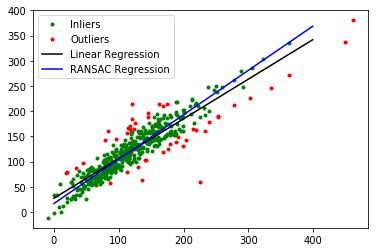

In [39]:
X =np.reshape(time*vy_start,[-1,1])
Y = dy
model = linear_model.LinearRegression()
model.fit(X, Y)

# 使用RANSAC算法拟合X,y
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, Y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# 使用一般回归模型和RANSAC算法分别对测试数据做预测
line_X = np.arange(0, 400)
line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

# print("真实数据参数：", coef)
print("线性回归模型参数：", model.coef_,model.intercept_)
print("RANSAC算法参数： ", model_ransac.estimator_.coef_,model_ransac.estimator_.intercept_)
X_pre=time_pre*vy_start
Y_pre=model.predict(np.reshape(X_pre,[-1,1]))
plt.plot(X[inlier_mask], Y[inlier_mask], '.g', label='Inliers')
plt.plot(X[outlier_mask], Y[outlier_mask], '.r', label='Outliers')
plt.plot(line_X, line_y, '-k', label='Linear Regression')
plt.plot(line_X, line_y_ransac, '-b', label="RANSAC Regression")
plt.legend(loc='upper left')
plt.show()


In [40]:
x_pre

[-12.676999999999992,
 -11.509,
 -11.93,
 -10.316999999999997,
 -12.423000000000002,
 -12.486999999999995,
 -11.334,
 -11.316000000000003,
 -8.628999999999998,
 17.748,
 -11.712,
 -10.751999999999995,
 -10.575000000000003,
 -10.113000000000003,
 -12.365000000000002,
 -11.706000000000003,
 -10.708999999999996,
 -8.274000000000001,
 -12.521999999999998,
 -9.038,
 -11.033999999999999,
 -10.353000000000002,
 -9.931999999999995,
 -10.86,
 -15.926000000000002,
 -10.185000000000002,
 -10.358000000000004,
 -7.033000000000001,
 -11.728000000000002,
 -11.271,
 -9.482,
 -13.966999999999999,
 -11.131999999999998,
 -11.566000000000003,
 -9.775999999999996,
 -10.549,
 -10.526,
 -12.09800000000001,
 -10.21,
 -11.956999999999997,
 -11.766999999999996,
 -9.694000000000003,
 -9.994,
 -11.296,
 -11.992000000000004,
 -9.483999999999995,
 14.357,
 -15.197000000000003,
 -11.52600000000001,
 12.665,
 -10.018999999999998,
 14.236,
 -11.886000000000024,
 -9.384999999999998,
 -11.549999999999997,
 -9.7880000000

In [41]:
Y_pre

array([154.26542914,  96.29006303, 101.9223205 , 104.87194576,
       170.39099704, 112.00451845, 109.28341819,  92.79333701,
        73.60620097, 122.3053624 , 114.35232026, 129.73868427,
       137.14988451,  96.95296953, 165.3713714 , 156.6610349 ,
       103.85255769, 136.3134396 , 136.47570303, 129.42201318,
       122.68124629, 138.16651503, 106.22560966, 122.46218722,
       213.95228698,  88.14006431, 129.18781626, 122.19798996,
        85.58473466, 102.87800566, 102.7148511 , 128.63359788,
       137.75010545, 123.57201614, 107.60066849, 133.9341535 ,
       111.39838847, 128.74798468, 159.47684428, 138.95076532,
       143.96969105, 154.56827804, 147.38887285, 178.13270202,
       107.44783658, 104.54442805, 197.46958732, 138.50170494,
       132.98076311, 153.37006974, 152.2113086 , 242.20537673,
       202.11191396, 107.82834061, 133.99629214, 122.97308028,
       124.2271663 ,  94.22313384, 167.86219115, 182.23466689,
       118.95512324, 147.48104625, 166.18538491, 236.73

In [42]:
time_pre

array([6.14864184, 5.58213449, 5.78632935, 5.00398658, 6.02544589,
       6.05648739, 5.4972554 , 5.48852497, 4.18526706, 8.60819558,
       5.68059425, 5.21497177, 5.12912262, 4.9050418 , 5.99731454,
       5.67768411, 5.19411576, 4.01308374, 6.07346321, 4.38364163,
       5.35174837, 5.02144742, 4.81725257, 5.2673543 , 7.72448292,
       4.93996349, 5.02387254, 3.41116968, 5.68835462, 5.46669892,
       4.59899203, 6.77432205, 5.39928067, 5.60978083, 4.74158891,
       5.11651201, 5.10535648, 5.86781328, 4.95208908, 5.79942498,
       5.70727053, 4.70181699, 4.84732402, 5.47882451, 5.8164008 ,
       4.59996208, 6.96348118, 7.37090085, 5.59037989, 6.14282156,
       4.8594496 , 6.90479335, 5.76498832, 4.55194476, 5.60202045,
       4.74740919, 5.03163292, 3.60178389, 8.13772287, 7.55035951,
       5.16355929, 5.20333121, 5.67719908, 6.41734481, 6.16464762,
       5.20284618, 5.35465851, 7.46014516, 5.43565742, 8.21581164,
       5.88284901, 6.16610269, 5.33137739, 4.4636705 , 4.71879

In [43]:
xx=np.vstack((np.reshape(x_start,[1,-1]),np.reshape(x_start+x_pre,[1,-1]))).transpose()
yy=np.vstack((np.reshape(y_start,[1,-1]),np.reshape(y_start+Y_pre,[1,-1]))).transpose()
xx

array([[66.677, 54.   ],
       [29.509, 18.   ],
       [41.93 , 30.   ],
       [28.317, 18.   ],
       [54.423, 42.   ],
       [42.487, 30.   ],
       [29.334, 18.   ],
       [41.316, 30.   ],
       [50.629, 42.   ],
       [24.252, 42.   ],
       [29.712, 18.   ],
       [40.752, 30.   ],
       [40.575, 30.   ],
       [28.113, 18.   ],
       [42.365, 30.   ],
       [41.706, 30.   ],
       [52.709, 42.   ],
       [14.274,  6.   ],
       [42.522, 30.   ],
       [27.038, 18.   ],
       [53.034, 42.   ],
       [40.353, 30.   ],
       [51.932, 42.   ],
       [40.86 , 30.   ],
       [81.926, 66.   ],
       [64.185, 54.   ],
       [52.358, 42.   ],
       [37.033, 30.   ],
       [29.728, 18.   ],
       [17.271,  6.   ],
       [51.482, 42.   ],
       [43.967, 30.   ],
       [29.132, 18.   ],
       [41.566, 30.   ],
       [39.776, 30.   ],
       [28.549, 18.   ],
       [28.526, 18.   ],
       [30.098, 18.   ],
       [40.21 , 30.   ],
       [29.957, 18.   ],


In [44]:
vy_start

array([26.22, 15.71, 16.39, 19.7 , 30.15, 17.77, 18.95, 15.17, 14.08,
       14.02, 19.47, 24.95, 27.2 , 18.05, 29.23, 28.93, 18.73, 34.5 ,
       22.83, 29.59, 22.64, 28.04, 20.82, 22.95, 30.67, 15.66, 25.76,
       35.34, 13.03, 17.57, 20.84, 19.  , 25.98, 21.8 , 21.52, 26.47,
       20.93, 21.96, 33.89, 24.45, 25.96, 34.37, 31.46, 34.95, 17.51,
       21.34, 31.02, 19.16, 24.01, 26.06, 32.64, 39.5 , 38.49, 22.48,
       24.19, 25.6 , 24.47, 23.62, 21.93, 26.05, 22.55, 29.33, 31.06,
       41.42, 32.71, 10.37, 25.8 , 20.15, 21.16, 42.07, 28.71,  8.59,
       23.92, 28.24, 33.68, 29.5 , 25.96, 24.7 , 32.5 , 36.03, 28.37,
       32.66, 26.08, 25.39, 38.14, 22.48, 32.29, 16.79, 27.06, 30.44,
       21.63, 26.73, 28.54, 20.25, 17.35,  7.51, 14.84, 31.95, 34.09,
       13.6 , 14.85, 34.62, 24.95, 22.89, 33.84, 33.13, 11.23, 21.52,
       22.22, 26.48, 42.89, 35.66, 37.83, 32.68, 25.05, 18.66, 37.23,
       37.16, 49.38, 41.64, 31.37, 27.64, 26.58, 21.99, 63.28, 41.24,
       29.23, 26.61,

In [45]:
import math
y2=[]
y3=[]
for i in range(len(vy_start)):
    y2.append(y_start[i]+Y_pre[i]*0.25)
    y3.append((y_start[i]+Y_pre[i])-Y_pre[i]*0.25)
y2=np.array(y2)
y3=np.array(y3)
y2

array([ 627.29135728,  410.10551576,  793.83558012,  992.84498644,
       1215.08674926, 1439.91612961,  789.26385455,  949.30333425,
       1453.26755024,  277.3413406 ,  718.36208006,  237.47267107,
        520.73447113,  759.68424238,  257.73884285,  612.17025873,
       1204.72613942,  956.0883599 ,  692.82292576, 1007.9985033 ,
        309.06731157,  325.25462876,  337.95440241, 1477.6885468 ,
        628.25807175,  801.20601608, 1093.16595406,  928.18949749,
         87.60018366,  198.97150142, 1087.58971277, 1215.37439947,
        503.01252636,  626.74700403,  474.50716712, 1182.11353837,
        480.41559712,  347.56099617,  758.24521107,  428.74469133,
        311.00142276, 1135.63606951,  831.12221821, 1142.61817551,
        609.03795914,  981.43410701, 1545.24039683,  624.62842623,
       1059.66319078, 1517.07151744,  496.18982715, 1544.51734418,
        347.91297849, 1501.72608515, 1275.51807303,  298.19827007,
        174.46579158,  443.73778346,  616.08454779,  753.91366

In [46]:
pi4=math.sin(math.pi/4)
x2=[]
for i in range(len(x_start)):
    x2.append(x_start[i]+x_pre[i]*pi4)
x2=np.array(x2)  
x2

array([57.71300733, 21.37090806, 33.4942161 , 21.02177934, 45.63861246,
       33.65735762, 21.31965174, 33.31437966, 44.52737559, 36.80173115,
       21.43036538, 33.14918789, 33.09734579, 20.96202912, 33.62162465,
       33.42860802, 45.13659348,  8.42339849, 33.66760889, 20.64716891,
       45.23178378, 33.03232349, 44.90901545, 33.18082036, 70.6646174 ,
       56.98311743, 45.03378796, 32.05991801, 21.43505167,  9.30119947,
       44.7772135 , 34.09083959, 21.26048731, 33.38760297, 32.86332411,
       21.08973057, 21.08299402, 21.54342216, 32.99043976, 21.50212422,
       45.44647451, 32.83930686, 32.92717483, 21.3085218 , 69.51237548,
       56.77779929, 61.79493206, 70.45109825, 57.37588724, 62.29050738,
       44.93449716, 37.83037214, 81.4813288 , 44.74880286, 33.38291668,
       44.86683883, 33.03847425, 80.17502504, 46.91416243, 34.55946874,
       21.11814121, 21.14215845, 33.42831513, 21.87527018, 26.27732719,
       69.14186556, 57.23354114, 46.5049906 , 45.2824543 , 70.96

In [47]:
l2=np.vstack((x_start,y2)).transpose()
l3=np.vstack((x_start+x_pre,y3)).transpose()
l_start=np.vstack((x_start,y_start)).transpose()
l_end=np.vstack((x_start+x_pre,y_start+Y_pre)).transpose()
l3

array([[  54.        ,  704.42407185],
       [  18.        ,  458.25054727],
       [  30.        ,  844.79674037],
       [  18.        , 1045.28095932],
       [  42.        , 1300.28224778],
       [  30.        , 1495.91838883],
       [  18.        ,  843.90556364],
       [  30.        ,  995.70000276],
       [  42.        , 1490.07065073],
       [  42.        ,  338.4940218 ],
       [  18.        ,  775.53824019],
       [  30.        ,  302.3420132 ],
       [  30.        ,  589.30941338],
       [  18.        ,  808.16072715],
       [  30.        ,  340.42452855],
       [  30.        ,  690.50077618],
       [  42.        , 1256.65241827],
       [   6.        , 1024.2450797 ],
       [  30.        ,  761.06077727],
       [  18.        , 1072.70950989],
       [  42.        ,  370.40793472],
       [  30.        ,  394.33788628],
       [  42.        ,  391.06720724],
       [  30.        , 1538.91964041],
       [  66.        ,  735.23421524],
       [  54.        ,  8

In [48]:
l_all=[]
for i in range(len(l_start)):
    a=[]
    a.append(l_start[i])
    a.append(l2[i])
    a.append(l3[i])
    a.append(l_end[i])
    l_all.append(a)
np.array(l_all) 

array([[[  66.677     ,  588.725     ],
        [  66.677     ,  627.29135728],
        [  54.        ,  704.42407185],
        [  54.        ,  742.99042914]],

       [[  29.509     ,  386.033     ],
        [  29.509     ,  410.10551576],
        [  18.        ,  458.25054727],
        [  18.        ,  482.32306303]],

       [[  41.93      ,  768.355     ],
        [  41.93      ,  793.83558012],
        [  30.        ,  844.79674037],
        [  30.        ,  870.2773205 ]],

       ...,

       [[  50.409     , 1016.375     ],
        [  50.409     , 1047.84630224],
        [  66.        , 1110.78890671],
        [  66.        , 1142.26020894]],

       [[   9.155     , 1391.103     ],
        [   9.155     , 1424.21486348],
        [  18.        , 1490.43859045],
        [  18.        , 1523.55045394]],

       [[  55.159     ,  686.687     ],
        [  55.159     ,  693.47161166],
        [  42.        ,  707.04083497],
        [  42.        ,  713.82544662]]])

In [49]:
angel[-14]=0
angel

array([1.62793929, 1.67969173, 1.68811362, 1.67740329, 1.62518397,
       1.63063285, 1.62343261, 1.67019479, 1.65405028, 0.99263761,
       1.69741796, 1.62158215, 1.62532745, 1.70089085, 1.62216762,
       1.52381146, 1.64743429, 1.61104959, 1.61401693, 1.64181788,
       1.64782676, 1.68334457, 1.49815794, 1.66332275, 1.61946665,
       1.68861783, 1.52184095, 1.61321115, 1.65110896, 1.71330414,
       1.6489636 , 1.63104136, 1.5335187 , 1.66616407, 1.6298292 ,
       1.67128018, 1.62107552, 1.62000906, 1.62471961, 1.75244425,
       1.65452558, 1.63760666, 1.61805056, 1.64882563, 1.73489664,
       1.66678427, 1.64144834, 1.64818371, 1.63117671, 1.63110046,
       1.63663145, 1.60947223, 1.60277702, 1.63201786, 1.67086686,
       1.66088506, 1.61088721, 1.67762505, 1.66707446, 1.67506815,
       1.70254353, 1.65713943, 1.53698243, 1.51893664, 1.65025788,
       1.79678158, 1.62269394, 1.67888861, 1.61802827, 1.59453564,
       1.66827794, 1.80027683, 1.69712624, 1.60723424, 1.54047

In [50]:
def make_bezier(xys):
    # xys should be a sequence of 2-tuples (Bezier control points)
    n = len(xys)
    combinations = pascal_row(n-1)
    def bezier(ts):
        # This uses the generalized formula for bezier curves
        # http://en.wikipedia.org/wiki/B%C3%A9zier_curve#Generalization
        result = []
        for t in ts:
            tpowers = (t**i for i in range(n))
            upowers = reversed([(1-t)**i for i in range(n)])
            coefs = [c*a*b for c, a, b in zip(combinations, tpowers, upowers)]
            result.append(
                tuple(sum([coef*p for coef, p in zip(coefs, ps)]) for ps in zip(*xys)))
        return result
    return bezier
def pascal_row(n):
    # This returns the nth row of Pascal's Triangle
    result = [1]
    x, numerator = 1, n
    for denominator in range(1, n//2+1):
        # print(numerator,denominator,x)
        x *= numerator
        x /= denominator
        result.append(x)
        numerator -= 1
    if n&1 == 0:
        # n is even
        result.extend(reversed(result[:-1]))
    else:
        result.extend(reversed(result)) 
    return result

In [51]:
from numpy.linalg import cholesky
id_num=1
known_trajectory=0
points_num=5
xy_val=l_all[id_num]
xy_val=np.array(xy_val)

s_tol=[]
for i in range(len(xy_val)):
    if i==0:
        continue
    else:
        mu = np.array([xy_val[i]])
        Sigma = np.array([[0.5, 0], [0, 3.5*i+0.1]])
        R = cholesky(Sigma)
        s = np.dot(np.random.randn(points_num, 2), R) + mu
        s_tol.append(s)
s_tol=np.array(s_tol) 

s_tol[2][:,0]=xy_val[3,0]
s_end=s_tol[2]
s_start=[]
if known_trajectory==0:
    for i in range(points_num):
        s_start.append(xy_val[0])
    s_start=np.reshape(s_start,[-1,2])
    s_mid=s_tol[:3].reshape([-1,2])
    s_all=np.vstack((s_start,s_mid,s_end))
    s_lis=np.reshape(s_all,[5,points_num,2]).tolist()
s_all    

array([[ 29.509     , 386.033     ],
       [ 29.509     , 386.033     ],
       [ 29.509     , 386.033     ],
       [ 29.509     , 386.033     ],
       [ 29.509     , 386.033     ],
       [ 29.23147538, 412.21123871],
       [ 29.99652773, 406.50622457],
       [ 28.81242813, 408.1097613 ],
       [ 28.80439325, 412.7842282 ],
       [ 29.71825405, 408.39946441],
       [ 18.54133256, 457.61114046],
       [ 18.20861489, 456.65526494],
       [ 17.30770624, 456.58211559],
       [ 19.32941057, 453.4326851 ],
       [ 18.06255305, 458.54164318],
       [ 18.        , 477.45387205],
       [ 18.        , 484.19221921],
       [ 18.        , 481.06214996],
       [ 18.        , 480.99545702],
       [ 18.        , 480.81300688],
       [ 18.        , 477.45387205],
       [ 18.        , 484.19221921],
       [ 18.        , 481.06214996],
       [ 18.        , 480.99545702],
       [ 18.        , 480.81300688]])

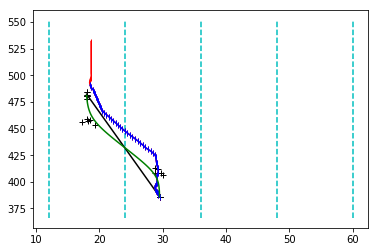

In [52]:
# id_num=17
ts = [t/100.0 for t in range(101)]
bezier = make_bezier(s_all)
points = bezier(ts)
points=np.array(points)

x_truth=local_x[id_num]
y_truth=local_y[id_num]
x_new=change_lane_x [id_num]
y_new=change_lane_y [id_num]
x_mid=x_truth[39]
y_mid=y_truth[39]
XX=xx[id_num]
YY=yy[id_num]




plt.plot(s_all[:,0],s_all[:,1],'+',color='black')
plt.plot(XX,YY, color='black', marker='|')
plt.plot(x_truth,y_truth, color='red', marker='|')
plt.plot(x_new,y_new, color='blue', marker='|')
plt.plot(points[:,0],points[:,1], label = "ran", color='green')
plt.vlines([12,24,36,48,60], min(y_truth)-20, max(y_truth)+20, colors = "c", linestyles = "dashed")
plt.show()